# Introduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import os

In [4]:
df = pd.read_csv('ipl_2025_deliveries.csv')
df.head()

,match_id,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,...,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.1,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.2,...,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.3,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.4,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.5,...,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [5]:
df['total_runs'] = df['runs_of_bat'] + df['extras']


## Total Runs Scored by Each Team in this season

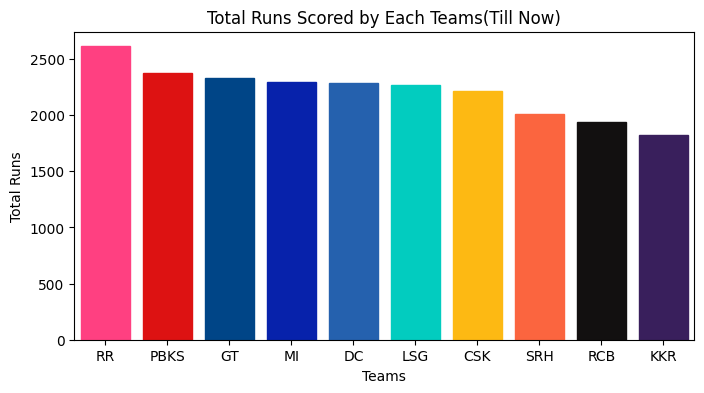

In [128]:
team_runs = df.groupby('batting_team')['total_runs'].sum().reset_index()
team_runs = team_runs.sort_values(by='total_runs',ascending=False)
plt.figure(figsize=(8,4))
bars = sns.barplot(x='batting_team',y='total_runs',data=team_runs)

def teamcolors(bars,criterion):
    for bar, team in zip(bars.patches, criterion):
        if team=='SRH':
            bar.set_color('#fb653f')
        elif team == 'RCB':
            bar.set_color('#121010')
        elif team == 'CSK':
            bar.set_color('#fdb913')
        elif team == 'MI':
            bar.set_color('#0722ab')
        elif team == 'KKR':
            bar.set_color('#391F5C')
        elif team == 'PBKS':
            bar.set_color('#dd1212')
        elif team == 'RR':
            bar.set_color('#FF4081')
        elif team == 'GT':
            bar.set_color('#004587')
        elif team == 'LSG':
            bar.set_color('#02ccbf')
        elif team == 'DC':
            bar.set_color('#2561AE')

teamcolors(bars, team_runs['batting_team'])
plt.title('Total Runs Scored by Each Teams(Till Now)')
plt.ylabel('Total Runs') 
plt.xlabel('Teams')
plt.savefig("runs.png")
plt.show()

## Average Runs Scored by Each Team per innings in the season(Till now)

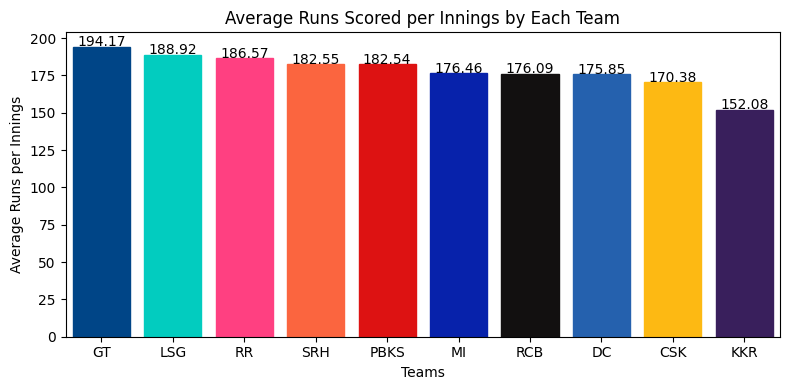

In [14]:
team_match_runs = df.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()

# Calculating the number of innings for each team
innings = team_match_runs['batting_team'].value_counts().to_frame(name='innings').reset_index()
innings.columns =['batting_team','innings']

# Calculating total runs for each team
total_batting_team_runs = team_match_runs.groupby('batting_team')['total_runs'].sum().reset_index()

# Merge total runs and innings counts
team_batting_average_runs = pd.merge(total_batting_team_runs, innings, on='batting_team')

# Calculate average runs per innings
team_batting_average_runs['average_batting_runs_per_innings']= team_batting_average_runs['total_runs']/team_batting_average_runs['innings']

# Sorting by average runs per innings
team_batting_average_runs = team_batting_average_runs.sort_values(by='average_batting_runs_per_innings',ascending=False)

plt.figure(figsize=(8,4))
bars = sns.barplot(x='batting_team',y='average_batting_runs_per_innings',data=team_batting_average_runs)
teamcolors(bars,team_batting_average_runs['batting_team'])

#Adding values on top of the bars
for bar, value in zip(bars.patches, team_batting_average_runs['average_batting_runs_per_innings']):
    bars.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,round(value,2),ha='center',color='black',fontsize=10) # type: ignore

teamcolors(bars, team_batting_average_runs['average_batting_runs_per_innings'])
plt.title('Average Runs Scored per Innings by Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Runs per Innings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("averageruns.png")
plt.show()


## Total Runs Conceded by Each Teams

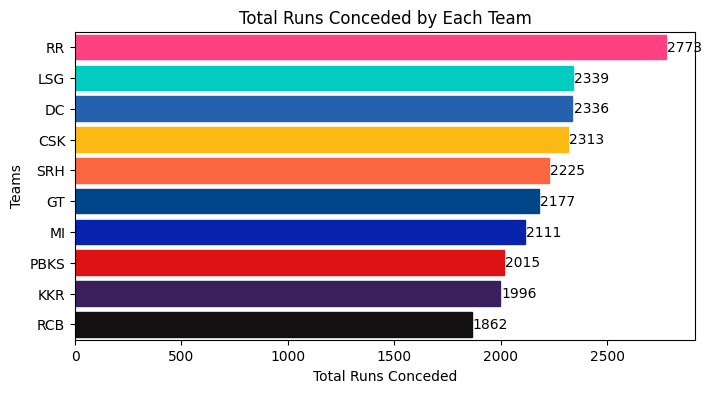

In [127]:
team_runs_conceded = df.groupby('bowling_team')['total_runs'].sum().reset_index()

team_runs_conceded = team_runs_conceded.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(8, 4))
bars = sns.barplot(x='total_runs', y='bowling_team', data=team_runs_conceded)
for bar, value in zip(bars.patches, team_runs_conceded['total_runs']):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, round(value, 2), va='center', ha='left',fontsize=10, color='black') #type:ignore 
teamcolors(bars,team_runs_conceded['bowling_team'])
plt.title('Total Runs Conceded by Each Team')
plt.xlabel('Total Runs Conceded')
plt.ylabel('Teams')
plt.savefig("TotalRunsconced.png")
plt.show()

## Average Runs Conceded by Each Team

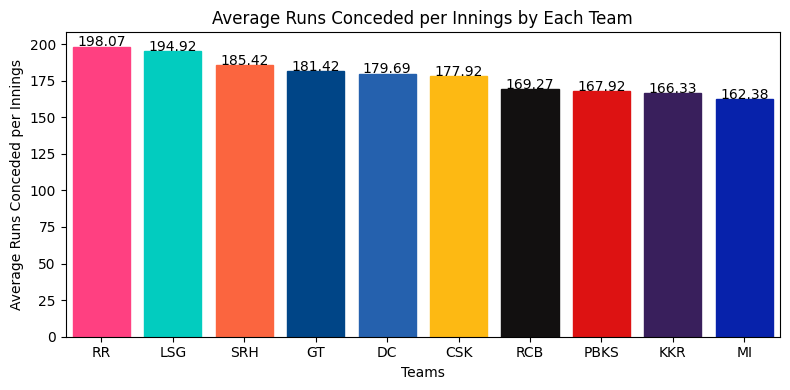

In [43]:
team_runs_conceded = df.groupby(['match_id', 'bowling_team'])['total_runs'].sum().reset_index()

# Calculate the number of innings for each team
innings_counts1 = team_runs_conceded['bowling_team'].value_counts().to_frame(name='innings').reset_index()
innings_counts1.columns = ['bowling_team', 'innings']

# Calculate total runs for each team
total_team_runs_conceded = team_runs_conceded.groupby('bowling_team')['total_runs'].sum().reset_index()

# Merge total runs and innings counts
team_avg_runs_conceded = pd.merge(total_team_runs_conceded, innings_counts1, on='bowling_team')

team_avg_runs_conceded['average_runs_conceded_per_innings'] = team_avg_runs_conceded['total_runs'] / team_avg_runs_conceded['innings']

team_avg_runs_conceded = team_avg_runs_conceded.sort_values(by='average_runs_conceded_per_innings', ascending=False)

plt.figure(figsize=(8, 4))  # Adjusting figure size
bars = sns.barplot(x='bowling_team', y='average_runs_conceded_per_innings', data=team_avg_runs_conceded)
teamcolors(bars, team_avg_runs_conceded['bowling_team'])

for bar, value in zip(bars.patches, team_avg_runs_conceded['average_runs_conceded_per_innings']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, round(value, 2), ha='center', color='black', fontsize=10) #type:ignore
teamcolors(bars,team_avg_runs_conceded['average_runs_conceded_per_innings'])
plt.title('Average Runs Conceded per Innings by Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Runs Conceded per Innings')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.savefig("Averageconceded.png")
plt.show()


## Total Wickets Taken by Each Team in this season

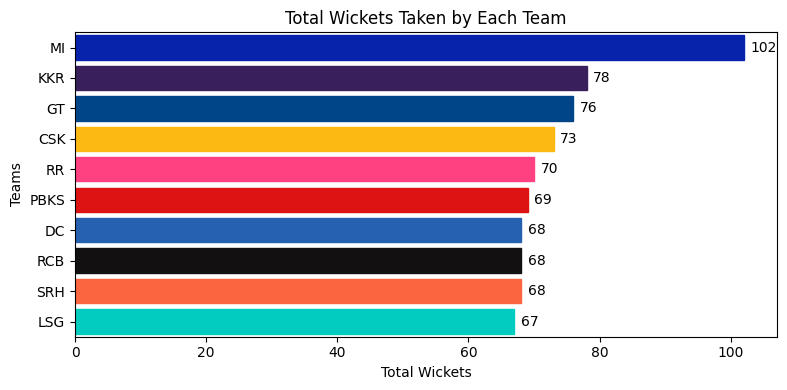

In [99]:
wickets = df[df['wicket_type'].notnull()]

team_wickets = wickets.groupby('bowling_team')['wicket_type'].count().reset_index()

# Sorting by wickets
team_wickets = team_wickets.sort_values(by='wicket_type',ascending=False)

# Plotting the total wickets taken by each team
plt.figure(figsize=(8,4))
bars = sns.barplot(x='wicket_type',y='bowling_team',data=team_wickets)
teamcolors(bars,team_wickets['bowling_team'])

# Adding total wickets on top of bar
for bar, value in zip(bars.patches,team_wickets['wicket_type']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() /2, int(value), va='center',ha='left',color='black',fontsize=10) # type: ignore
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Total Wickets')
plt.ylabel('Teams')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('total_wickets.png')
plt.show()

In [20]:
import math 
df['over_'] = df['over'].map(lambda x:math.ceil(x))

## Teamwise Run rate

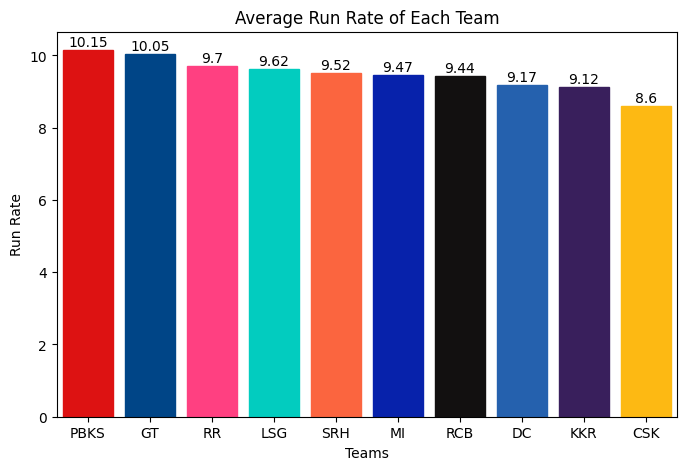

In [100]:
# Filtering Out Wide and no-ball deliveries
legal_deliveries = df[(df['noballs'] == 0) & (df['wide']==0)]

# counting the number of legal deliveries faced by each team
balls_faced = legal_deliveries.groupby('batting_team').size().reset_index(name='balls_faced')

# Calculating total runs scored by each team
total_runs = df.groupby('batting_team')['total_runs'].sum().reset_index()

team_stats = pd.merge(balls_faced,total_runs,on='batting_team')

# Overs faced
team_stats['overs_faced'] = team_stats['balls_faced']/6

# Calculate run rate 
team_stats['run_rate'] = team_stats['total_runs'] / team_stats['overs_faced']

# Sort by run rate
team_stats = team_stats.sort_values(by='run_rate',ascending=False)
 
# Plot average run rate for each team
plt.figure(figsize=(8,5))
bars = sns.barplot(x='batting_team',y='run_rate',data=team_stats)
teamcolors(bars,team_stats['batting_team'])
for bar, value in zip(bars.patches,team_stats['run_rate']):
    bars.text(bar.get_x() + bar.get_width() /2, bar.get_height() + 0.1, round(value, 2), ha='center',color='black',fontsize=10) # type: ignore

plt.title('Average Run Rate of Each Team')
plt.xlabel("Teams")
plt.ylabel('Run Rate')
plt.savefig('Runrate.png')
plt.show()

## TeamWise Economy

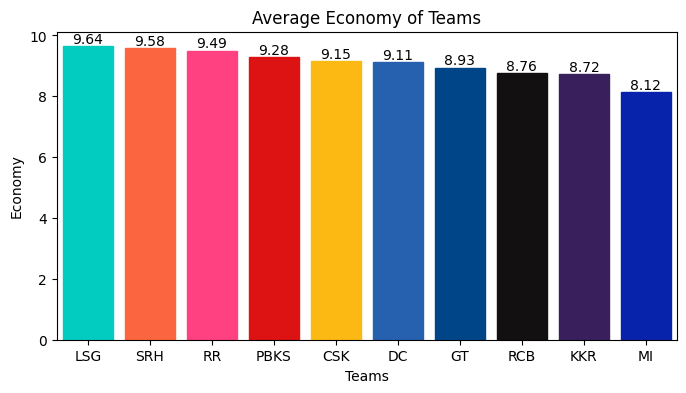

In [102]:
balls_bowled = df.groupby('bowling_team').size().reset_index(name='balls_bowled')

# Total Runs conceded by each team
total_runs = df.groupby('bowling_team')['total_runs'].sum().reset_index()

# Merge the two dataframes on batting_team
team_stats = pd.merge(balls_bowled, total_runs, on='bowling_team')

# Overs 
team_stats['overs_bowled'] = team_stats['balls_bowled'] / 6

# Economy
team_stats['economy'] = team_stats['total_runs'] / team_stats['overs_bowled']

# Sorting by economy

team_stats = team_stats.sort_values(by='economy',ascending=False)

# Average economy for each team
plt.figure(figsize=(8,4))
bars = sns.barplot(x='bowling_team',y='economy',data=team_stats)
teamcolors(bars, team_stats['bowling_team'])
for bar, value in zip(bars.patches, team_stats['economy']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2), ha='center', color='black', fontsize=10) # type:ignore 
plt.title('Average Economy of Teams')
plt.xlabel('Teams')
plt.ylabel('Economy')
plt.savefig('economy.png')
plt.show()
    

## Top Runs Scorers in this season

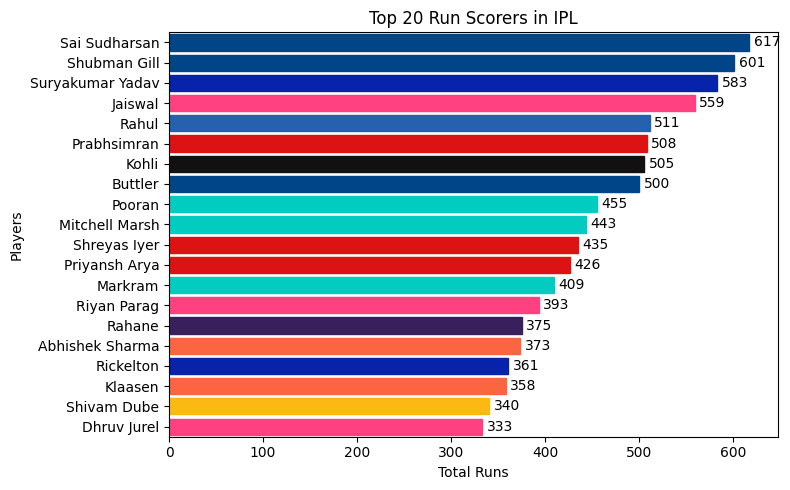

In [104]:
# Your aggregation logic
top_run_scorer = df.groupby(['striker']).agg(
    Team = ('batting_team', lambda x: x.unique()[0]),
    Inns = ('match_id', lambda x: len(x.unique())),
    Runs = ('runs_of_bat', 'sum'),
    SR = ('runs_of_bat', lambda x: round((x.mean() * 100), 2))
).sort_values(by=['Runs', 'SR'], ascending=False).reset_index()

top_run_scorer['Average'] = round(top_run_scorer['Runs'] / top_run_scorer['Inns'], 2)
top_run_scorer.index += 1
top20 = top_run_scorer[:20]

# Plotting
plt.figure(figsize=(8,5))
bars = sns.barplot(x='Runs', y='striker', data=top20)

for bar, value in zip(bars.patches, top20['Runs']):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,int(value), va='center', ha='left', fontsize=10, color='black') # type: ignore
teamcolors(bars, top20['Team'])

plt.title("Top 20 Run Scorers in IPL")
plt.xlabel('Total Runs')
plt.ylabel('Players')
plt.tight_layout()
plt.savefig("Top20.png")
plt.show()


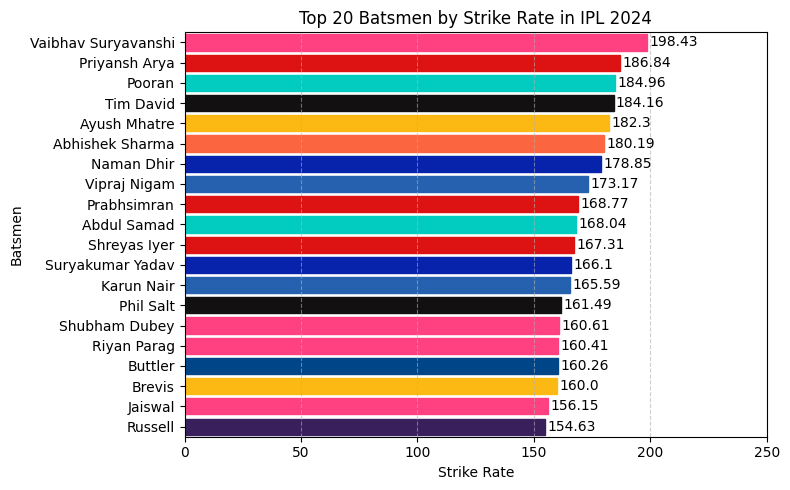

In [105]:
batsman_runs = df.groupby('striker')['runs_of_bat'].sum().reset_index()
balls_faced = df.groupby('striker')['match_id'].count().reset_index()
balls_faced.columns = ['striker', 'balls_faced']

batsman_strike_rate = pd.merge(batsman_runs, balls_faced, on='striker')
batsman_strike_rate['strike_rate'] = round((batsman_strike_rate['runs_of_bat'] / batsman_strike_rate['balls_faced']) * 100, 2)
top_strike_rate_batsmen = batsman_strike_rate[batsman_strike_rate['runs_of_bat'] > 100].sort_values(
    by='strike_rate', ascending=False).head(20)

top_strike_rate_batsmen = pd.merge(top_strike_rate_batsmen, df[['striker', 'batting_team']].drop_duplicates('striker'),
                                   on='striker', how='left')
top_strike_rate_batsmen.rename(columns={'batting_team': 'Team'}, inplace=True)

plt.figure(figsize=(8,5))
bars = sns.barplot(x='strike_rate', y='striker', data=top_strike_rate_batsmen)

for bar, value in zip(bars.patches, top_strike_rate_batsmen['strike_rate']):
    plt.text(bar.get_width() + 1,  bar.get_y() + bar.get_height() / 2,f'{value}',va='center', ha='left', fontsize=10, color='black') #type:ignore
teamcolors(bars, top_strike_rate_batsmen['Team'])

plt.xticks([0, 50, 100, 150, 200, 250])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Top 20 Batsmen by Strike Rate in IPL 2024')
plt.xlabel('Strike Rate')
plt.ylabel('Batsmen')
plt.tight_layout()
plt.savefig("Top20_StrikeRates.png")
plt.show()


## Top Wicket Takers

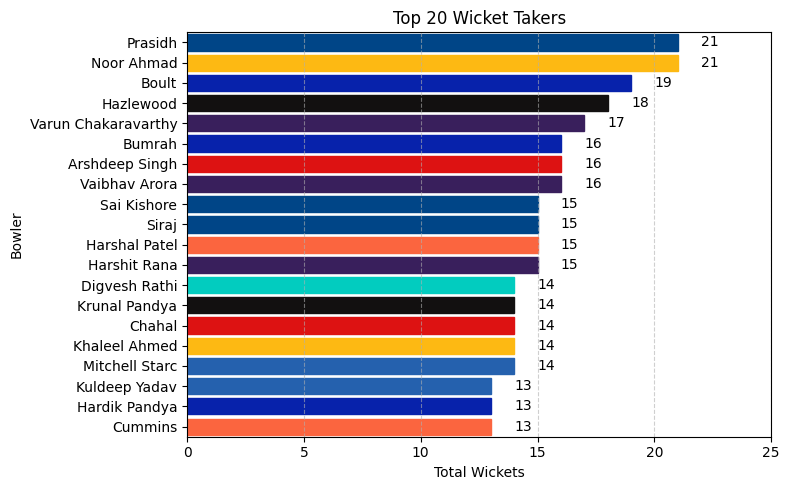

In [107]:
top_wicket_takers = df.loc[(~df['wicket_type'].isin(['runout','retired out','retired hurt'])) & (df['byes']==0) & (df['legbyes']==0)].groupby('bowler').agg(
    Team = ('bowling_team',lambda x: x.unique()[0]),
    Match = ('match_id',lambda x: len(x.unique())),
    Wickets = ('wicket_type', 'count'),
    Economy = ('total_runs', lambda x: (x.mean() * 6)),
    Runs = ('runs_of_bat','sum'),

).sort_values(by=['Wickets','Economy'], ascending=[False,True]).reset_index()
top_wicket_takers.index += 1
top_wicket = top_wicket_takers.iloc[:20,:-1]

plt.figure(figsize=(8,5))
bars = sns.barplot(x='Wickets', y='bowler', data=top_wicket)

for bar, value in zip(bars.patches, top_wicket['Wickets']):
    plt.text(bar.get_width() + 1,  bar.get_y() + bar.get_height() / 2,f'{value}',va='center', ha='left', fontsize=10, color='black') #type:ignore
teamcolors(bars, top_wicket['Team'])

plt.xticks([0, 5, 10, 15,20, 25])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Top 20 Wicket Takers')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.tight_layout()
plt.savefig("Top20_WicketTakers.png")
plt.show()

## Bowlers with Best Economy(Overs bowled>10)

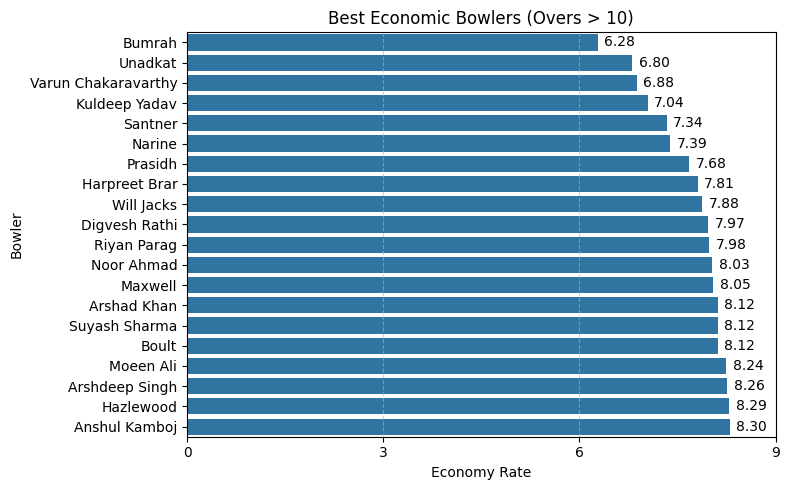

In [108]:
# Calculate the number of overs bowled by each bowler
balls_bowled = df.groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = df.loc[(df['byes'] == 0) & (df['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[~df['wicket_type'].isin(['runout','retired out','retired hurt'])].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

top20 = best_econ_bowlers.head(20)

plt.figure(figsize=(8,5))
bars = sns.barplot(x='economy_rate', y='bowler', data=top20)

for bar, value in zip(bars.patches, top20['economy_rate']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,f'{value:.2f}', va='center', ha='left', fontsize=10, color='black') # type:ignore
plt.xticks([0, 3, 6, 9])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Best Economic Bowlers (Overs > 10)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.tight_layout()
plt.savefig("BestEconomy.png")
plt.show()



## Powerplay Average Teamwise

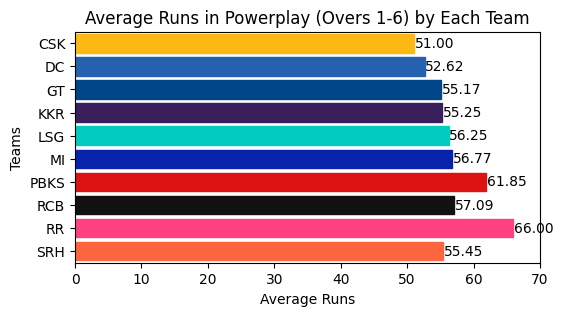

In [115]:
# Filter data for powerplay overs (1-6)
powerplay_data = df[df['over'] <= 6]

# Group by 'batting_team' and sum the 'total_runs'
powerplay_runs = powerplay_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data1 = pd.merge(powerplay_runs, innings, on='batting_team')

merged_data1['average'] = merged_data1['total_runs'] / merged_data1['innings']
# Plotting the total runs scored by each team in powerplay
plt.figure(figsize=(6,3))
bars = sns.barplot(x='average', y='batting_team', data=merged_data1)
for bar, value in zip(bars.patches, merged_data1['average']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,f'{value:.2f}', va='center', ha='left', fontsize=10, color='black') # type:ignore

teamcolors(bars, merged_data1['batting_team'])
plt.title('Average Runs in Powerplay (Overs 1-6) by Each Team')
plt.xticks([i for i in range(0,80,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.savefig("averagepowerplay.png")
plt.show()

## Teamwise Average Runs in Middle Overs (7-16)

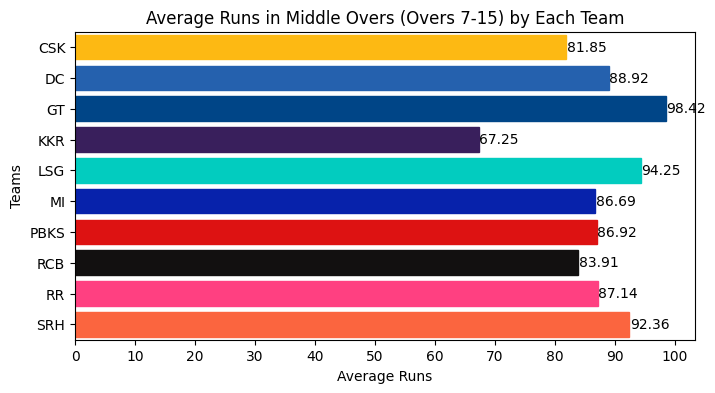

In [126]:

middle_overs_data = df[(df['over'] > 6) & (df['over'] <= 16)]

middle_overs_runs = middle_overs_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data2 = pd.merge(middle_overs_runs, innings, on='batting_team')

merged_data2['average'] = merged_data2['total_runs'] / merged_data2['innings']

plt.figure(figsize=(8,4))
bars = sns.barplot(x='average', y='batting_team', data=merged_data2)
for bar, value in zip(bars.patches, merged_data2['average']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,f'{value:.2f}', va='center', ha='left', fontsize=10, color='black') # type:ignore

teamcolors(bars, merged_data2['batting_team'])
plt.title('Average Runs in Middle Overs (Overs 7-15) by Each Team')
plt.xticks([i for i in range(0,110,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.savefig("Aveage715.png")
plt.show()

## Average Runs in Death Overs(16-20)

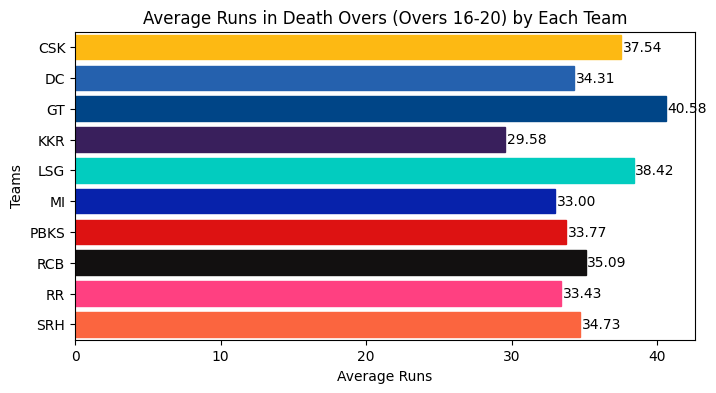

In [125]:
death_overs_data = df[df['over'] >= 16]

death_overs_runs = death_overs_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data3 = pd.merge(death_overs_runs, innings, on='batting_team')

merged_data3['average'] = merged_data3['total_runs'] / merged_data3['innings']
plt.figure(figsize=(8, 4))
bars = sns.barplot(x='average', y='batting_team', data=merged_data3)
for bar, value in zip(bars.patches, merged_data3['average']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,f'{value:.2f}', va='center', ha='left', fontsize=10, color='black') # type:ignore

teamcolors(bars, merged_data3['batting_team'])
plt.title('Average Runs in Death Overs (Overs 16-20) by Each Team')
plt.xticks([i for i in range(0,50,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.savefig("Averagedeath.png")
plt.show()


## Top Powerplay hitters

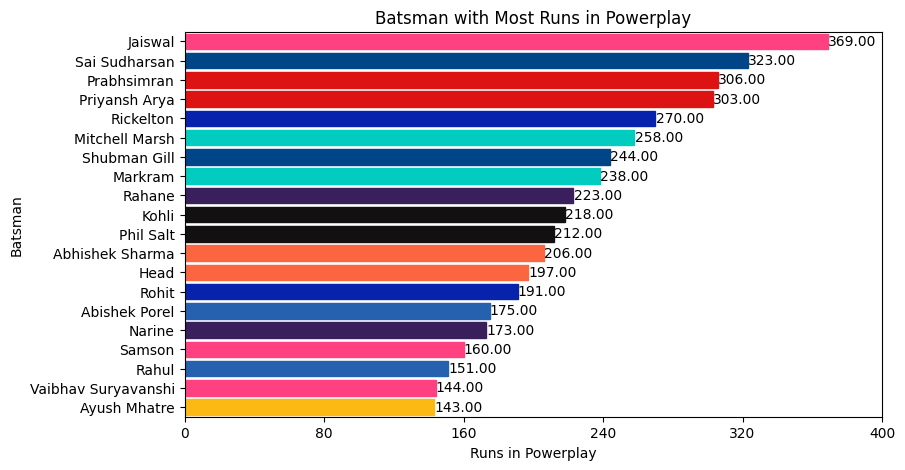

In [123]:
top_run_scorer_powerplay = df[df['over'] < 6].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_powerplay.index += 1
top_powerplay_player = top_run_scorer_powerplay[:20]

plt.figure(figsize=(9,5))
bars = sns.barplot(x='Runs', y='striker', data=top_powerplay_player)
for bar, value in zip(bars.patches, top_powerplay_player['Runs']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,f'{value:.2f}', va='center', ha='left', fontsize=10, color='black') # type:ignore

teamcolors(bars, top_powerplay_player['Team'])
plt.title('Batsman with Most Runs in Powerplay')
plt.xticks([0, 80, 160, 240, 320, 400])
plt.xlabel('Runs in Powerplay')
plt.ylabel('Batsman')
plt.savefig('Powerplayhitter.png')
plt.show()


## Top Strikerate player in Powerplay

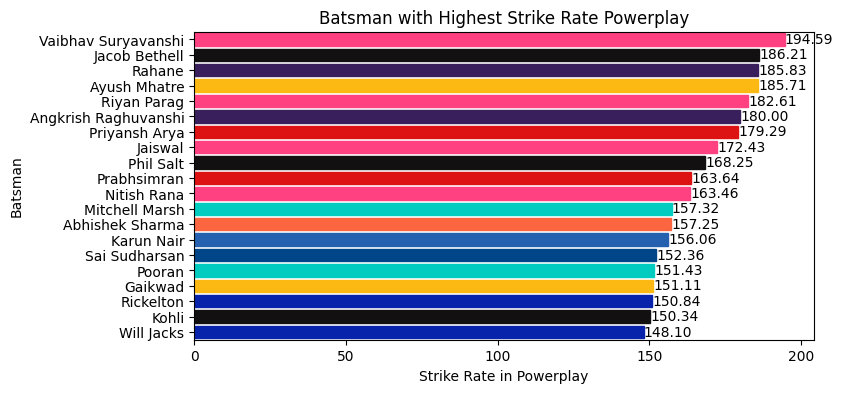

In [120]:
top_sr_powerplay = df[df['over'] < 6].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_powerplay = top_sr_powerplay[top_sr_powerplay['Runs'] > 50].reset_index()
top_sr_powerplay.index += 1
top_striker = top_sr_powerplay[:20]

plt.figure(figsize=(8, 4))
bars = sns.barplot(x='SR', y='striker', data=top_striker)
for bar, value in zip(bars.patches, top_striker['SR']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,f'{value:.2f}', va='center', ha='left', fontsize=10, color='black') # type:ignore

teamcolors(bars, top_striker['Team'])
plt.title('Batsman with Highest Strike Rate Powerplay')
plt.xticks([0, 50, 100, 150, 200])
plt.xlabel('Strike Rate in Powerplay')
plt.ylabel('Batsman')
plt.savefig('PowerplaySR.png')
plt.show()


## Most Wicket Takers in Powerplay

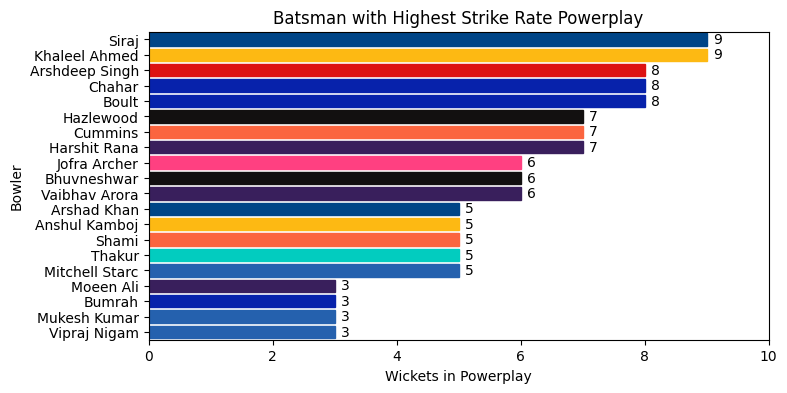

In [119]:
top_wicket_takers_powerplay = df[df['over'] < 6].loc[(~df['wicket_type'].isin(['runout','retired out','retired hurt'])) & (df['byes'] == 0) & (df['legbyes'] == 0)].groupby('bowler').agg(
        Team = ('bowling_team',lambda x: x.unique()[0]),
        Match = ('match_id',lambda x: len(x.unique())),
        Wickets = ('wicket_type','count'),
        Economy = ('total_runs', lambda x: (x.mean() * 6)),
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['Wickets','Economy'],ascending=[False,True]).reset_index()
top_wicket_takers_powerplay.index += 1
top_powerplay_wicket=top_wicket_takers_powerplay.iloc[:20,:-1]

plt.figure(figsize=(8,4))
bars = sns.barplot(x='Wickets', y='bowler', data=top_powerplay_wicket)
for bar, value in zip(bars.patches, top_powerplay_wicket['Wickets']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,int(value), va='center', ha='left', fontsize=10, color='black') # type:ignore

teamcolors(bars, top_powerplay_wicket['Team'])
plt.title('Batsman with Highest Strike Rate Powerplay')
plt.xticks([0, 2, 4, 6, 8, 10])
plt.xlabel('Wickets in Powerplay')
plt.ylabel('Bowler')
plt.savefig('Powerplaywickets.png')
plt.show()

## Best Economy in Powerplay

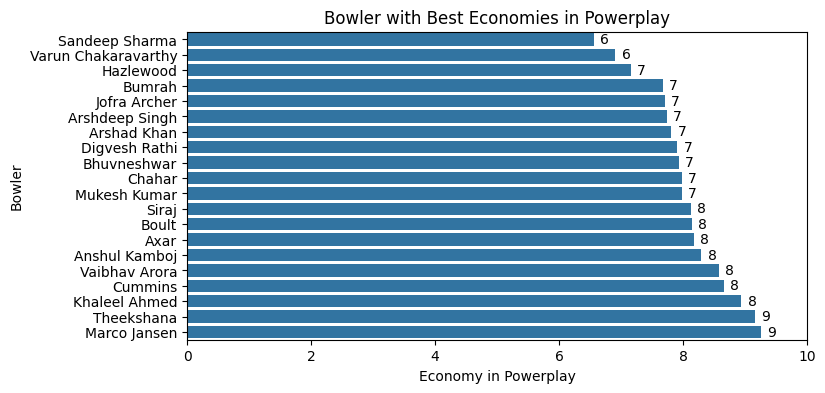

In [124]:
balls_bowled = df[df['over'] < 6].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

bowler_runs_conceded = df[df['over'] < 6].loc[(df['byes'] == 0) & (df['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']
bowler_wickets = wickets.loc[(~df['wicket_type'].isin(['runout','retired out','retired hurt'])) &(df['over'] < 6)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ = best_econ_bowlers.head(20)


plt.figure(figsize=(8,4))
bars = sns.barplot(x='economy_rate', y='bowler', data=best_econ)
for bar, value in zip(bars.patches, best_econ['economy_rate']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,int(value), va='center', ha='left', fontsize=10, color='black') # type:ignore

plt.title('Bowler with Best Economies in Powerplay')
plt.xticks([0, 2, 4, 6, 8, 10])
plt.xlabel('Economy in Powerplay')
plt.ylabel('Bowler')
plt.savefig('BowlerPPeconomy.png')
plt.show()

